This is just my space, where I brainstorm and write down my steps, initial questions, and the way I approach data, so ignore any grammar or spelling mistakes because I type too fast so as not to miss the thoughts flying in my mind.

1- Let's first import our library friends to help us discover the interesting data about movies that was scraped from the famous platform IMDB!

2- Let's just have a look at the data and the columns. Let's just stare at them.

3- Now let's check the nature of the data: its columns, rows, types, descriptions, and the regular first glance discovery.

4- Time to clean it a bit, check for missing and duplicate values!

5- Now let's write our questions. What could be asked after staring at this data?

a. (Budget vs Gross Revenue)
    Now let's check the correlation. I guess budget and gross revenue would be correlated as it makes some sense; I mean you get what you pay for, unless you are Chelsea F.C.
    
b. (Season vs Gross)
    I was wondering, since we have the month column, why not create a new column for the season? I remember when I used to work in the clothing industry, the season was something important, so let's check if it matters here as well. Let's find out how to do that, then keep the findings as they are, whether it turns out to be true or not.
    
c. (Writer vs Gross)
    Since I love Game of Thrones and I think the writer of the novel is a genius from another planet, I would assume that the writer does impact revenue. Let's examine that.

6-Let's do some aggregation and filtering.

---

Findings:

Intitial hypothes:
writer vs gross = the correlation between writer and gross was 0.78 (I cinsidered this as a strong correlation)
budget vs gross = the correlation between budget  and gross was 0.53 (I considered this as a moderate correlation)
season vs gross = There was no correlation.

New finding:
director vs gross = director and gross correlation was 0.69. (I considered this a strong correlation)

The following got a correlation between o.62 and 0.64:

Writer vs director

company vs gross

Vote vs gross

Star vs gross

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r"movies.csv")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r"movies.csv")

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.describe()


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df.shape

(7668, 15)

In [6]:
df.size

115020

---

Ok Lets clean our data a bit

In [7]:
null_values = df.isnull().sum()
null_values

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
total_null = null_values.sum()
total_null

2473

In [9]:
df = df.dropna()


In [10]:
#Lets make sure missing were removed
df.isnull().sum().sum()

0

In [11]:
#lets check for any duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7648    False
7649    False
7650    False
7651    False
7652    False
Length: 5421, dtype: bool

In [12]:
# Converting budget and gross into int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [14]:
#Ok why two dates? Lets just keep the release date, lets create a new column and call it yearc.

df[['month','day', 'yearc']] = df['released'].str.extract(r'(\w+) (\d{1,2}), (\d{4})')

df.head()

# Thank you regular expression!! I didn't know you are this useful!

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day,yearc
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June,13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July,2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June,20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July,2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July,25,1980


---

In [16]:
#Ok now lets see who made loads of money!

df = df.sort_values(by= ['gross'], inplace = False, ascending = False)
df.head()

# Avatar it is

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day,yearc
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018


In [17]:
#Just to check if sorted properly.
df['gross'].max()

2847246203

In [19]:
# Lets display the whole dataframe

pd.set_option('display.max_rows', None)

In [21]:
# An attempt to group months into seasons to find out correlation with gross reveune

season_map = {
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter'
}

df['season'] = df['month'].map(season_map)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day,yearc,season
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,Winter
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,Spring
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,Winter
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,Winter
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,Spring


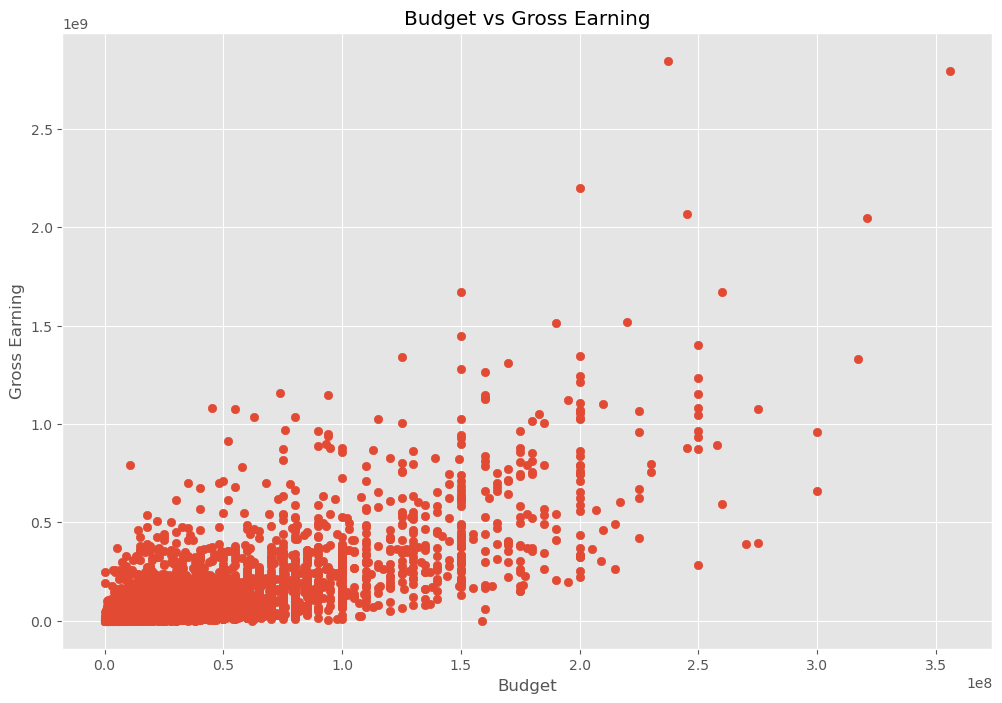

In [22]:
#Ok now since we got the seasons, lets plot them all with the other variables and see if there are any correlations.
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()


In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day,yearc,season
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,Winter
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,Spring
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,Winter
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,Winter
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,Spring


<Axes: xlabel='budget', ylabel='gross'>

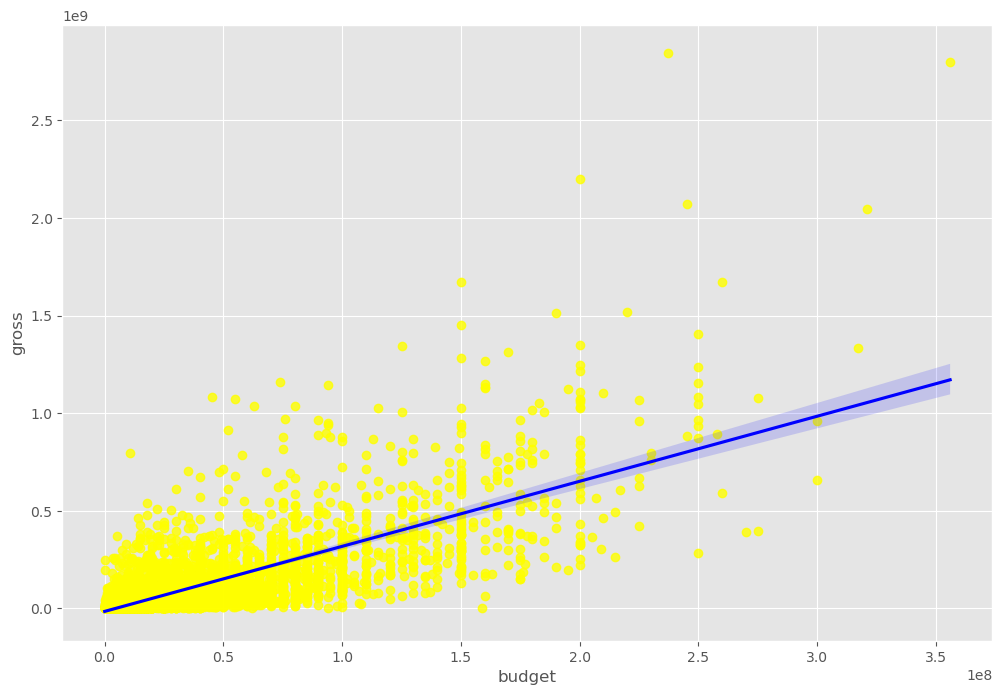

In [24]:
#lets use regression plot using seaborn

sns.regplot(x='budget', y='gross', data= df, scatter_kws={'color':'yellow'}, line_kws={'color':'blue'})

In [ ]:
df.corr()

In [26]:
#lets convert categorical data nto numbers so we can find correlations
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
correlation_matrix


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day,yearc,season
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.133404,0.004394,0.252262,0.041274
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.078626,0.011387,0.079971,0.033848
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,-0.009132,0.026648,0.069579,0.010176
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,-0.034123,-0.015626,0.941033,0.001137
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.141938,0.003872,0.345581,-0.007272
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.013865,0.000987,0.050638,-0.016602
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.076306,-0.009919,0.279039,0.010386
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.097902,0.006706,0.182703,0.032908
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.099859,-0.018171,0.220652,0.009447
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.090307,-0.002041,0.233830,0.038789


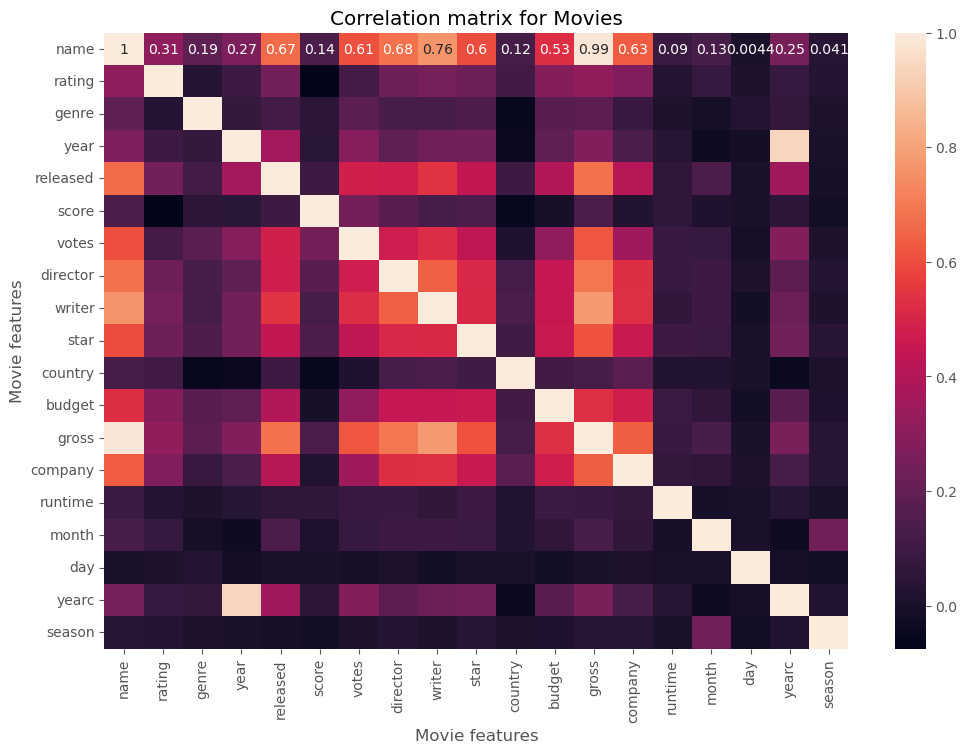

In [44]:
#Visulizing correlation using seaborn

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [45]:
#Lets find pairs
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.314800
          genre       0.186668
          year        0.267282
          released    0.667785
          score       0.136453
          votes       0.608411
          director    0.679808
          writer      0.764057
          star        0.599410
          country     0.124405
          budget      0.526690
          gross       0.986431
          company     0.631721
          runtime     0.089567
          month       0.133404
          day         0.004394
          yearc       0.252262
          season      0.041274
rating    name        0.314800
          rating      1.000000
          genre       0.031419
          year        0.096638
          released    0.241253
          score      -0.075109
          votes       0.121122
          director    0.230190
          writer      0.251470
          star        0.226007
          country     0.111309
          budget      0.283770
          gross       0.319778
        

In [46]:
sorted_pairs = corr_pairs.sort_values()

print(sorted_pairs)

score     rating     -0.075109
rating    score      -0.075109
country   score      -0.057087
score     country    -0.057087
country   genre      -0.055109
genre     country    -0.055109
yearc     country    -0.048642
country   yearc      -0.048642
year      country    -0.047325
country   year       -0.047325
year      month      -0.034123
month     year       -0.034123
yearc     month      -0.032058
month     yearc      -0.032058
season    day        -0.020077
day       season     -0.020077
          writer     -0.018171
writer    day        -0.018171
budget    day        -0.017751
day       budget     -0.017751
score     season     -0.016602
season    score      -0.016602
year      day        -0.015626
day       year       -0.015626
votes     day        -0.009919
day       votes      -0.009919
          yearc      -0.009747
yearc     day        -0.009747
month     genre      -0.009132
genre     month      -0.009132
released  season     -0.007272
season    released   -0.007272
budget  

In [47]:
#strong correlation
strong_corr = sorted_pairs[(sorted_pairs) > 0.69]

strong_corr

director  gross       0.692902
gross     director    0.692902
writer    name        0.764057
name      writer      0.764057
writer    gross       0.776528
gross     writer      0.776528
year      yearc       0.941033
yearc     year        0.941033
gross     name        0.986431
name      gross       0.986431
          name        1.000000
star      star        1.000000
day       day         1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
yearc     yearc       1.000000
director  director    1.000000
country   country     1.000000
budget    budget      1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
month     month       1.000000
writer    writer      1.000000
season    season      1.000000
dtype: float64

Interesting finding! So, my hypothesis that the writer does have an impact on gross turned out to be true, as the correlation between writer and gross was 0.78. Additionally, I found out that director and gross also showed a strong positive correlation of 0.69.

In [48]:
moderate_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 0.69)]


moderate_corr

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
writer    votes       0.522918
votes     writer      0.522918
name      budget      0.526690
budget    name        0.526690
director  company     0.528071
company   director    0.528071
writer    company     0.532013
company   writer      0.532013
gross     budget      0.532810
budget    gross       0.532810
writer    released    0.541155
released  writer      0.541155
star      name        0.599410
name      star        0.599410
          votes       0.608411
votes     name        0.608411
gross     star        0.612142
star      gross       0.612142
gross     votes       0.620450
votes     gross       0.620450
company   name        0.631721
name      company     0.631721
gross     company     0.637241
company   gross       0.637241
director  writer      0.642875
writer    director    0.642875
name      released    0.667785
released  name        0.667785
        

gross and budget  0.53
Writer and director is 0.64? Ok lets find out who they are at the top as pairs.

company and gross 0.63.

Vote and gross 0.62.

Star and gross 0.61.

In [49]:
#writers that made most gross revenue
top_writers = df.groupby('writer')['gross'].sum().sort_values(ascending = False).head()
top_writers

writer
Christopher Markus    7587181621
James Cameron         6282146001
John Lasseter         4656539205
Chris Morgan          4360332296
J.K. Rowling          4152832057
Name: gross, dtype: int64

In [50]:
#directors that made most gross revenue
top_directors = df.groupby('director')['gross'].sum().sort_values(ascending = False).head()
top_directors

director
Steven Spielberg    9629049370
Anthony Russo       6844248984
Peter Jackson       6618045788
Michael Bay         6451692798
James Cameron       6248088578
Name: gross, dtype: int64

In [53]:
# I'm trying to find out those writers and directors that made the most by working together as a team.
writer_director_gross = df.groupby(['writer', 'director'])['gross'].sum().reset_index()

top_writer_director_pairs = writer_director_gross.sort_values(by='gross', ascending=False)

top_writer_director_pairs.head()

,writer,director,gross
707,Christopher Markus,Anthony Russo,6713620081
1803,James Cameron,James Cameron,5869206167
1398,Fran Walsh,Peter Jackson,3626587086
1283,Ehren Kruger,Michael Bay,3064151844
1774,J.R.R. Tolkien,Peter Jackson,2991216079


---

In [35]:
# Check the distribution of Writers and Names
writer_distribution = df['writer'].value_counts()
name_distribution = df['name'].value_counts()

print(writer_distribution.head(10))  # Top 10 writers
print(name_distribution.head(10))    # Top 10 movie titles


writer
Woody Allen           32
Stephen King          29
John Hughes           20
Luc Besson            14
Joel Coen             13
Wes Craven            12
Quentin Tarantino     11
David Mamet           11
M. Night Shyamalan    11
Robert Rodriguez      11
Name: count, dtype: int64
name
Hercules                        3
Crash                           2
Teenage Mutant Ninja Turtles    2
Halloween                       2
A Nightmare on Elm Street       2
Hamlet                          2
Rampage                         2
The Fog                         2
The Hitcher                     2
Heat                            2
Name: count, dtype: int64


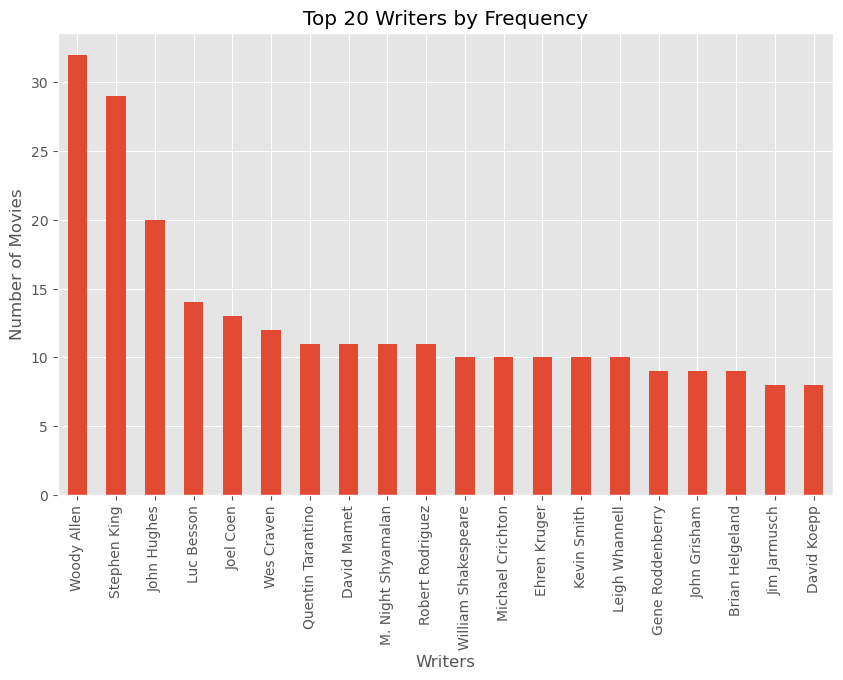

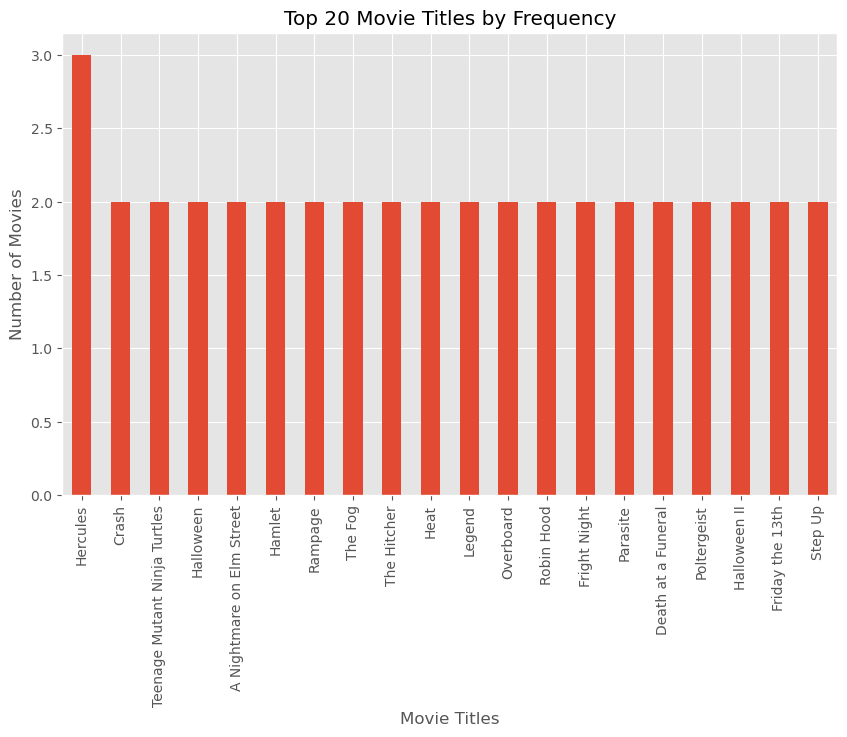

In [41]:
# Plot the distribution of writers
plt.figure(figsize=(10, 6))
writer_distribution.head(20).plot(kind='bar')
plt.title("Top 20 Writers by Frequency")
plt.xlabel("Writers")
plt.ylabel("Number of Movies")
plt.show()

# Plot the distribution of movie titles
plt.figure(figsize=(10, 6))
name_distribution.head(20).plot(kind='bar')
plt.title("Top 20 Movie Titles by Frequency")
plt.xlabel("Movie Titles")
plt.ylabel("Number of Movies")
plt.show()


In [42]:
writer_movie = df.groupby('writer')['name'].count().reset_index()
writer_movie_sort = writer_movie.sort_values(by='name', ascending=False)
writer_movie_sort


,writer,name
3184,Woody Allen,32
2832,Stephen King,29
1513,John Hughes,20
1879,Luc Besson,14
1456,Joel Coen,13
3124,Wes Craven,12
1898,M. Night Shyamalan,11
2601,Robert Rodriguez,11
706,David Mamet,11
2447,Quentin Tarantino,11


Lesson learnt from this project:

1- There is more than one way to approach a problem.

2- Have initial ideas and questions, or you'll be drawn into endless analyzing.

3- Use variables and always keep a copy of the original data! I had to repeat everything.

4- I loved the idea of splitting columns and creating new values out of what we have.

5- When manipulating data, make sure to only alter the columns that you want, not the entire dataframe.

6- Always experiment first before altering the entire values.

7- Converting categorical data into numerical data to check for correlation is useful.

8- We have three types of correlations.

9- Regular Expression are so useful.